# Netflix Future Share Price Prediction Using LSTM Method

**About Dataset**

The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. 
In fact, investors are highly interested in the research area of stock price prediction. For a good and 
successful investment, many investors are keen on knowing the future situation of the stock market. Good 
and effective prediction systems for the stock market help traders, investors, and analyst by providing 
supportive information like the future direction of the stock market.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NFLX.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.shape

(1009, 7)

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df1 = df['Close']
df1

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

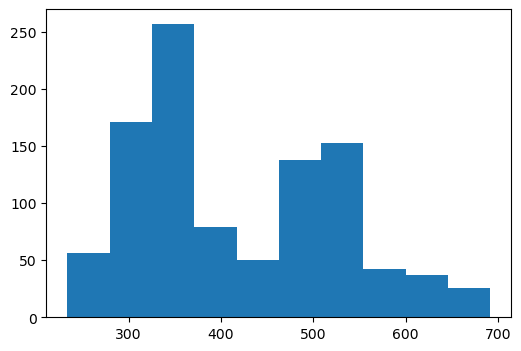

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df1)
plt.show()

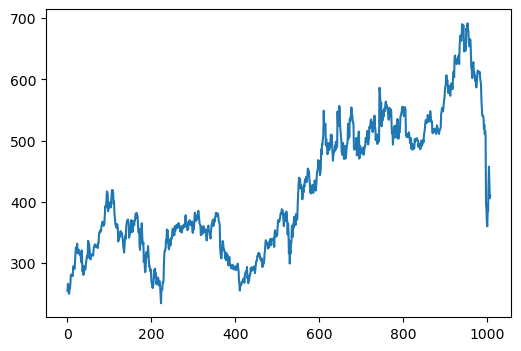

In [8]:
plt.figure(figsize=(6,4))
plt.plot(df1)
plt.show()

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler((0,1))
data = scaler.fit_transform(np.array(df1).reshape([df1.shape[0],1]))

In [12]:
data.shape

(1009, 1)

In [13]:
time_step = 100
def createData(data):
    x = []
    y = []
    for i in range(len(data) - time_step -1):
        x.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return x, y

In [14]:
x, y = createData(data)

In [15]:
x = np.array(x)
x = x.reshape(x.shape[0], x.shape[1],1)
y = np.array(y)

In [16]:
df1.shape

(1009,)

## Performing Train and Test on the Data

In [17]:
xtrain,xtest,ytrain,ytest = x[:int(df1.shape[0]*0.8)],x[int(df1.shape[0]*0.8):],y[:int(df1.shape[0]*0.8)],y[int(df1.shape[0]*0.8):]

In [18]:
## **The above code work same like this**

# train_size = int(df.shape[0] * 0.8)
#x_train = x[:train_size]
# x_test = x[train_size:]
# y_train = y[:train_size]
# y_test = y[train_size:]


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [20]:
model=Sequential([
    LSTM(128,return_sequences=True,input_shape=xtrain[0].shape),
    LSTM(64,return_sequences=True),
    LSTM(32),
    Dense(16,activation="relu"),
    Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
26/26 [==============================] - 13s 192ms/step - loss: 0.0338 - root_mean_squared_error: 0.1839
Epoch 2/100
26/26 [==============================] - 5s 179ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580
Epoch 3/100
26/26 [==============================] - 5s 177ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528
Epoch 4/100
26/26 [==============================] - 5s 183ms/step - loss: 0.0029 - root_mean_squared_error: 0.0534
Epoch 5/100
26/26 [==============================] - 5s 181ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528
Epoch 6/100
26/26 [==============================] - 5s 176ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524
Epoch 7/100
26/26 [==============================] - 5s 176ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543
Epoch 8/100
26/26 [==============================] - 5s 181ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541
Epoch 9/100
26/26 [==============================] - 5s 180ms/step - lo

In [21]:
model.evaluate(xtest,ytest)

4/4 [==============================] - 2s 55ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432


[0.0018630597041919827, 0.043163176625967026]

In [22]:
trainPred = scaler.inverse_transform(model.predict(xtrain)).squeeze()
testPred = scaler.inverse_transform(model.predict(xtest)).squeeze()

4/4 [==============================] - 0s 53ms/step


In [23]:
# Calculating performance matrics using RMSE
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(ytrain, trainPred))
print(f"Root Mean Squared Error (RMSE) of Train Data: {rmse}")


Root Mean Squared Error (RMSE) of Train Data: 419.9368938780644


In [24]:
rmse = math.sqrt(mean_squared_error(ytest, testPred))
print(f"Root Mean Squared Error (RMSE) of Test Data: {rmse}")

Root Mean Squared Error (RMSE) of Test Data: 594.7896038681702


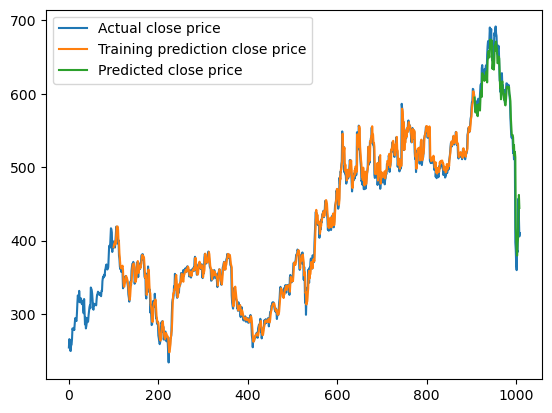

In [25]:
look_back = time_step
trainPredPlot = np.empty_like(df1)
trainPredPlot[:] = np.nan
trainPredPlot[look_back:len(trainPred)+look_back]=trainPred
testPredPlot = np.empty_like(df1)
testPredPlot[:] = np.nan
testPredPlot[len(trainPred) + look_back: len(trainPred) + look_back + len(testPred)] = testPred

plt.plot(df1,label="Actual close price")
plt.plot(trainPredPlot,label="Training prediction close price")
plt.plot(testPredPlot,label="Predicted close price")
plt.legend()
plt.show()

## Next 30 Days Prediction

In [26]:
input_data=np.array(df1[-time_step:])
input_data=input_data.reshape([input_data.shape[0],1])

In [27]:
def predict(data,days=30):
    data=scaler.transform(data)
    predictions=[]
    i=1
    while(i<=days):
        nxtday=model.predict([data],verbose=0)
        predictions.append(scaler.inverse_transform(nxtday)[0])
        data[:-1]=data[1:]
        data[-1]=nxtday[0]
        i+=1
    return np.array(predictions).squeeze()  

In [28]:
days=30
predictions=predict(input_data,days)
# predictions

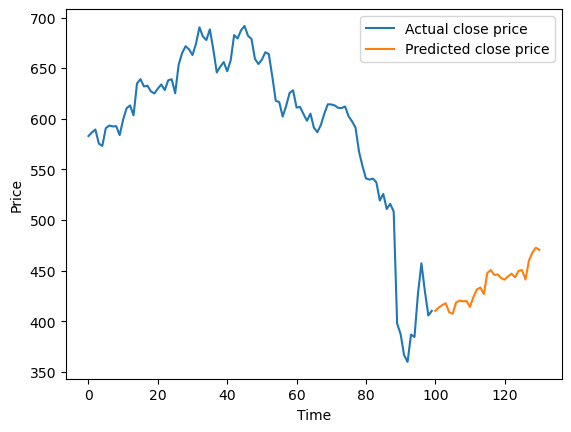

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined input_data, predictions, and days

trainPredPlot = np.zeros(shape=[len(input_data) + 1 + days])
trainPredPlot[:] = np.nan
trainPredPlot[len(input_data)] = input_data[-1]
trainPredPlot[len(input_data) + 1:] = predictions

df_ = input_data

plt.plot(df_, label="Actual close price")
plt.plot(trainPredPlot, label="Predicted close price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [30]:
## The orange part in the graph represent the furute value of the NFLX(Netflix) share price form 6th february 2022 to 7th march
## 2022 day that we have calculated which is looking good.